In [1]:
import os, sys
sys.path.append('/rds/general/user/tla19/home/FYP/MAax')

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read JSON files
with open('load_times.json', 'r') as f1, open('rollout_times.json', 'r') as f2, open('spawn_times.json', 'r')as f3, open('obj_cnts.json', 'r') as f4:
    load_data = json.load(f1)
    rollout_data = json.load(f2)
    spawn_data = json.load(f3)
    cnt_data = json.load(f4)

In [4]:
# Extract the sizes and corresponding rollout and spawn times
dims = list(rollout_data.keys())
rollout_values = list(rollout_data.values())
spawn_values = list(spawn_data.values())
load_values = list(load_data.values())
cnt_values = list(cnt_data.values())

In [5]:
mean_rollout = []
mean_spawn = []
mean_load = []
mean_cnt = []
std_rollout = []
std_spawn = []
std_load = []
std_cnt = []


for dim in dims:
    r_time = rollout_data[dim]  # Discard the first entry
    s_time = spawn_data[dim]  # Discard the first entry
    l_time = load_data[dim]  # Discard the first entry
    r_mean = np.mean(r_time)
    s_mean = np.mean(s_time)
    l_mean = np.mean(l_time)
    r_std = np.std(r_time)
    s_std = np.std(s_time)
    l_std = np.std(l_time)
    mean_rollout.append(r_mean)
    mean_spawn.append(s_mean)
    mean_load.append(l_mean)
    std_rollout.append(r_std)
    std_spawn.append(s_std)
    std_load.append(l_std)

In [6]:
dims_c = list(cnt_data.keys())
for dim_c in dims_c:
    cnts = cnt_data[dim_c]
    cnt_mean = np.mean(cnts)
    cnt_std = np.std(cnts)
    mean_cnt.append(cnt_mean)
    std_cnt.append(cnt_std)

In [7]:
dims = list(map(int, dims))
dims_c = list(map(int, dims_c))
print(dims)

[5, 10, 15, 20, 25, 30, 40]


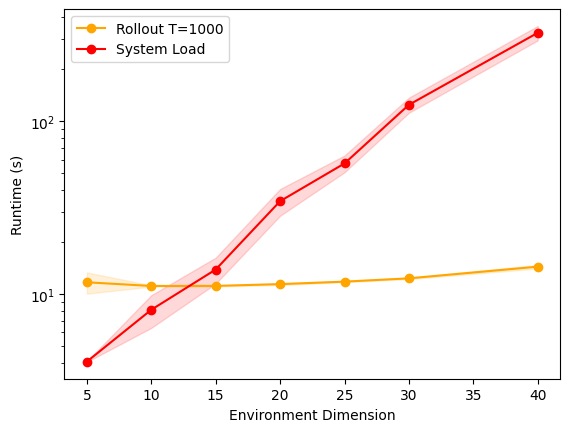

In [8]:
# Plotting
plt.plot(dims, mean_rollout, label='Rollout : T=1000', marker='o', color='orange')
plt.plot(dims, mean_load, label='System Load', marker='o', color='red')
plt.fill_between(dims, np.array(mean_rollout) - np.array(std_rollout),
                 np.array(mean_rollout) + np.array(std_rollout),
                 alpha=0.15, color='orange')
plt.fill_between(dims, np.array(mean_load) - np.array(std_load),
                 np.array(mean_load) + np.array(std_load),
                 alpha=0.15, color='red')
plt.xlabel('Environment Dimension')
plt.ylabel('Runtime (s)')
plt.yscale('log')
plt.legend()
plt.savefig('loadvrollout.png')
plt.show()

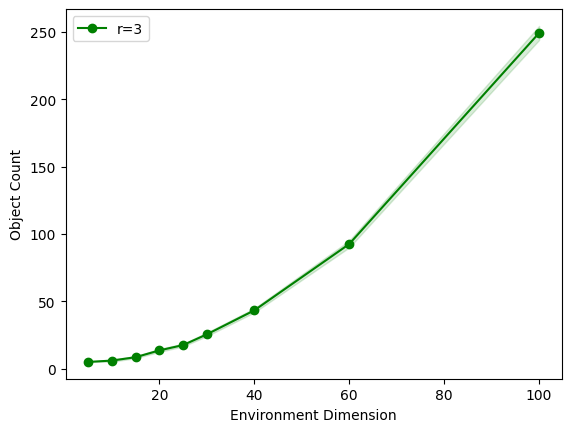

In [9]:
plt.plot(dims_c, mean_cnt, label='r=3', marker='o', color='green')
plt.fill_between(dims_c, np.array(mean_cnt) - np.array(std_cnt),
                 np.array(mean_cnt) + np.array(std_cnt),
                 alpha=0.15, color='green')
plt.xlabel('Environment Dimension')
plt.ylabel('Object Count')
plt.legend()
plt.savefig('dimvobj.png')
plt.show()